# **Proposta de Trabalho 2 - Mineração de dados**

### **Professor:** Wagner Meira Jr.
### **Aluno:** Gilliard Gabriel Rodrigues
### **Matrícula:** 2019054609


### **Tema:** Aprendizado de máquina não-supervisionado aplicado à segmentação de clientes
### **Base de dados:** https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis


In [1]:
#Bibliotecas usadas no projeto:
from google.colab import drive #Acesso ao google drive
from IPython.display import clear_output #Limpeza de outputs

import pandas as pd #Manipulação de dados
import numpy as np #Manipulação de matrizes

import matplotlib.pyplot as plt #Visualização de dados
import seaborn as sns #Visualização de dados
import plotly.graph_objects as go #Visualização de dados
import plotly.express as px #Visualização de dados

from sklearn.preprocessing import StandardScaler #Reescala de features
from sklearn.decomposition import PCA #Redução de dimensionalidade
from yellowbrick.cluster import KElbowVisualizer #Número ótimo de clusters
from sklearn.cluster import KMeans #Agrupamento

##**2. Data understanding (Entendimento dos dados)**


In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
pd.options.display.max_columns = None

In [4]:
#Carregando a base de dados
data_path = 'drive/MyDrive/Datasets/'
df = pd.read_csv(data_path + 'marketing_campaign.csv', delimiter='\t', encoding='utf8')
print(f'O dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas.')
df.head()

O dataset possui 2240 linhas e 29 colunas.


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


O dataset contém dados sobre clientes de um mercado e essas informações podem ser divididas em:

- Informações específicas do cliente
- Informações sobre quantidade gasta com certos produtos
- Informações sobre o uso de cupons e promoções
- Informações sobre quantidade de compras por local

In [5]:
# Verificando as colunas:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**Uma breve descrição sobre o que significa cada feature**

Features relativas à pessoa:

- ID: identificador exclusivo do cliente
- Year_Birth:  ano de nascimento do cliente
- Education: nível de educação do cliente
- Marital_Status: estado civil do cliente
- Income: renda familiar anual do cliente
- Kidhome: número de crianças na casa do cliente
- Teenhome: número de adolescentes na casa do cliente
- Dt_Customer: data do cadastro do cliente na empresa
- Recency: número de dias desde a última compra do cliente
- Complain: 1 se o cliente reclamou nos últimos 2 anos, 0 caso contrário

Features relativas a produtos:

- MntWines: valor gasto em vinho nos últimos 2 anos
- MntFruits: valor gasto em frutas nos últimos 2 anos
- MntMeatProducts: valor gasto em carne nos últimos 2 anos
- MntFishProducts: valor gasto em pescado nos últimos 2 anos
- MntSweetProducts: valor gasto em doces nos últimos 2 anos
- MntGoldProds: valor gasto em ouro nos últimos 2 anos

Features relativas a promoções:

- NumDealsPurchases: número de compras feitas com desconto
- AcceptedCmp1: 1 se o cliente aceitou a oferta na 1ª campanha, 0 caso contrário
- AcceptedCmp2: 1 se o cliente aceitou a oferta na 2ª campanha, 0 caso contrário
- AcceptedCmp3: 1 se o cliente aceitou a oferta na 3ª campanha, 0 caso contrário
- AcceptedCmp4: 1 se o cliente aceitou a oferta na 4ª campanha, 0 caso contrário
- AcceptedCmp5: 1 se o cliente aceitou a oferta na 5ª campanha, 0 caso contrário
- Resposta: 1 se o cliente aceitou a oferta na última campanha, 0 caso contrário

Features relativas a locais:

- NumWebPurchases: número de compras realizadas através do site da empresa
- NumCatalogPurchases: número de compras feitas usando um catálogo
- NumStorePurchases: número de compras feitas diretamente nas lojas
- NumWebVisitsMonth: número de visitas ao site da empresa no último mês

É possível ver que existem valores nulos no dataset, especificamente na coluna 'Income', que se trata da renda familiar anual. Como se tratam de poucas linhas, a estratégia adotada aqui será remover essas linhas:

In [6]:
df.dropna(axis=0, inplace=True)
if df.isnull().sum().sum() == 0:
  print(f'Não há dados faltantes no dataset!\nAgora a base possui {df.shape[0]} linhas')
else:
  print('Ainda há dados faltantes no dataset.')

Não há dados faltantes no dataset!
Agora a base possui 2216 linhas


Vamos converter o campo relativo à data de cadastro para o tipo _datetime_:

In [7]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Dt_Customer'].head()

0   2012-04-09
1   2014-08-03
2   2013-08-21
3   2014-10-02
4   2014-01-19
Name: Dt_Customer, dtype: datetime64[ns]

Esse campo só é útil para termos uma noção de tempo de clientela. Portanto, vamos criar uma nova coluna e remover a original:

In [8]:
# Consumidor mais recente:
most_recent_customer = max(df['Dt_Customer'])
df['Time_being_customer'] = (most_recent_customer - df['Dt_Customer']).dt.days
df.drop(columns='Dt_Customer', axis=1, inplace=True)
df['Time_being_customer'].head()

0    971
1    125
2    472
3     65
4    321
Name: Time_being_customer, dtype: int64

Primeiro vamos trabalhar com as features relativas às características da pessoa, começando pela renda anual:


In [9]:
sns.set_theme()

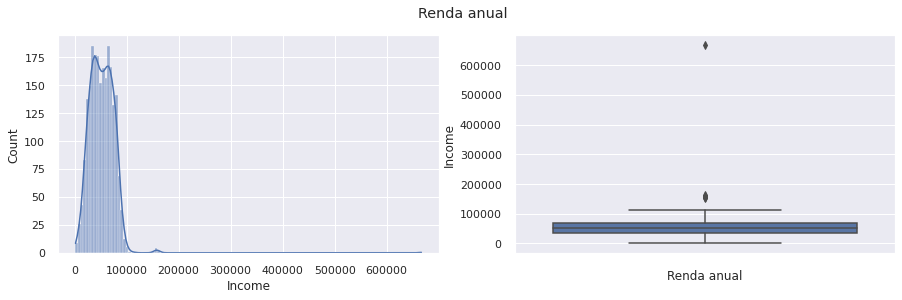

In [10]:
fig, ax = plt.subplots(1,2, figsize=(15,4))

fig.suptitle('Renda anual')

sns.histplot(data=df, x='Income', kde=True, ax = ax[0])
plt.xlabel("Renda anual", fontsize=12)
plt.ylabel("Contagem", fontsize=12)

sns.boxplot(y = df['Income'], ax = ax[1])

fig.show()

Olhando nos gráficos podemos ver que a maioria dos cliente possui uma renda anual abaixo de 100 mil dólares, o que não é surpresa, já que trata-se de um valor relativamente alto.

Também podemos notar que existem outliers. Mais a frente os trataremos e analisaremos melhor esses dados.

O ano de nascimento de um consumidor não nos diz muito, mas a sua idade sim. Vamos criar uma coluna 'Age' derivada de 'Year_Birth' e excluir essa última:

In [11]:
df['Age'] = 2022 - df['Year_Birth']
df.drop(columns='Year_Birth', axis=1, inplace=True)
df['Age'].head()

0    65
1    68
2    57
3    38
4    41
Name: Age, dtype: int64

Agora vamos dar uma olhada na distribuição das idades:

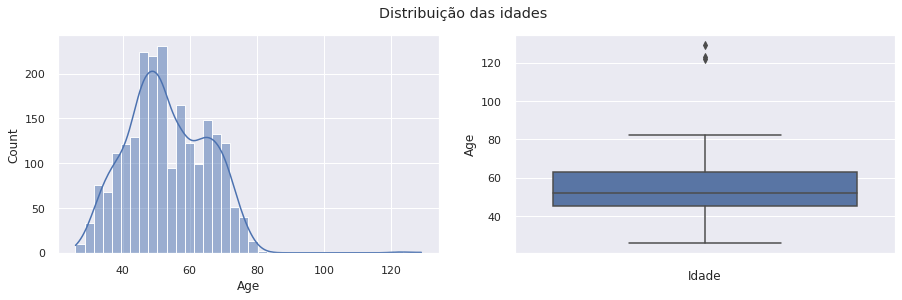

In [12]:
fig, ax = plt.subplots(1,2, figsize=(15,4))

fig.suptitle('Distribuição das idades')

sns.histplot(data=df, x='Age', kde=True, ax = ax[0])
plt.xlabel("Idade", fontsize=12)
plt.ylabel("Frequência", fontsize=12)

sns.boxplot(y = df['Age'], ax = ax[1])

fig.show()

Como podemos ver, também existem outliers aqui, trataremos na próxima seção.

Vamos dar uma olhada nos valores possíveis para as outras features e como eles se distribuem:

In [13]:
print(f"Valores que 'Education' pode assumir: \n{df['Education'].unique()}")

Valores que 'Education' pode assumir: 
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']


Vamos limitar esses valores a 3: quem não tem graduação, quem tem graduação e quem tem pós-graduação.

In [14]:
df['Education'] = df['Education'].replace({'Basic': 'Non-Graduate', '2n Cycle': 'Non-Graduate', 'Graduation': 'Graduate', 'Master': 'Post-Graduate', 'PhD': 'Post-Graduate'})

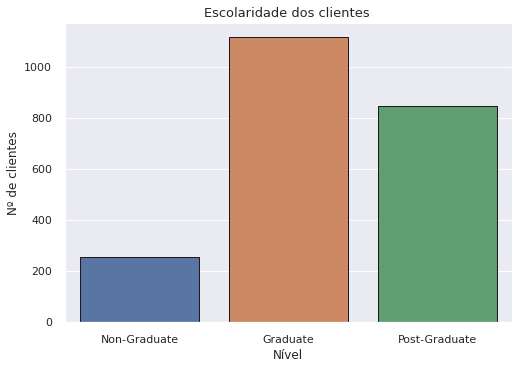

In [15]:
sns.countplot(x='Education', ec='k', data=df, order=['Non-Graduate', 'Graduate', 'Post-Graduate'])
plt.title('Escolaridade dos clientes ',fontsize=13)
plt.xlabel("Nível",fontsize=12)
plt.ylabel("Nº de clientes",fontsize=12)
plt.show()

A maioria dos clientes possui graduação, o que nos dá sinal de que trata-se de um público um pouco mais elitizado.

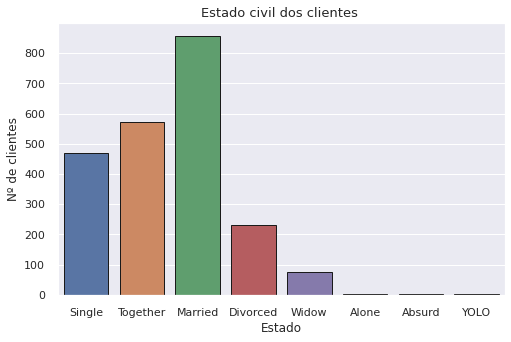

In [16]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Marital_Status', ec='k', data=df)
plt.title('Estado civil dos clientes ',fontsize=13)
plt.xlabel("Estado",fontsize=12)
plt.ylabel("Nº de clientes",fontsize=12)
plt.show()

Como podemos ver, existem vários estados civis listados, mas pode-se dizer que o mais importante aqui para nós é se a pessoa mora sozinha ou não. Portanto, vamos simplificar:

In [17]:
df['Living_Alone'] = np.where(df['Marital_Status'].isin(['Together', 'Married']), 0, 1)
df.drop(columns='Marital_Status', axis=1, inplace=True)
df['Living_Alone']

0       1
1       1
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    1
2238    0
2239    0
Name: Living_Alone, Length: 2216, dtype: int64

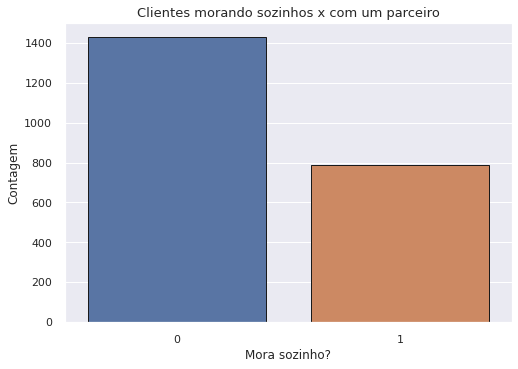

In [18]:
sns.countplot(x='Living_Alone', ec='k', data=df)
plt.title('Clientes morando sozinhos x com um parceiro',fontsize=13)
plt.xlabel("Mora sozinho?",fontsize=12)
plt.ylabel("Contagem",fontsize=12)
plt.show()

A maioria dos clientes mora com um parceiro.

Também combinaremos os valores das colunas 'Kidhome' e 'Teenhome' a fim de simplificar, uma vez que para o nosso objetivo não faz tem tanto impacto essa diferenciação.

In [19]:
df['NumChildren'] = df['Kidhome'] + df['Teenhome']
df.drop(columns=['Kidhome', 'Teenhome'], axis=1, inplace=True)
df['NumChildren']

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: NumChildren, Length: 2216, dtype: int64

Agora vamos dar uma olhada na distribuição:

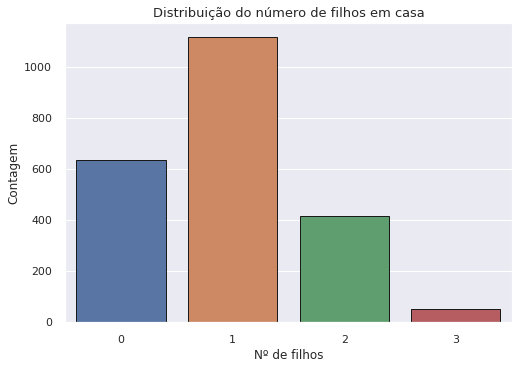

In [20]:
sns.countplot(x='NumChildren', ec='k', data=df)
plt.title('Distribuição do número de filhos em casa',fontsize=13)
plt.xlabel("Nº de filhos",fontsize=12)
plt.ylabel("Contagem",fontsize=12)
plt.show()

A maioria dos clientes possui 1 filho. Clientes com 2 ou 3 filhos são mais raros do que aqueles sem filhos.

Também é interessante ter uma visão do nº de clientes que são pais versus dos que não são:

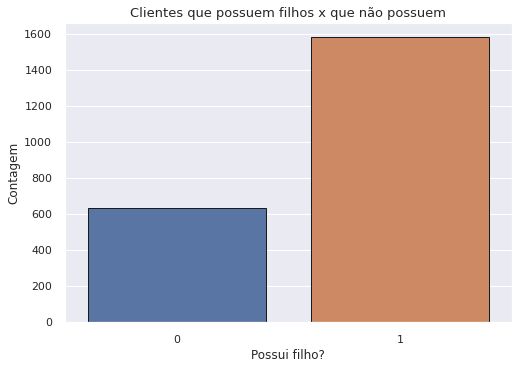

In [21]:
df['Is_Parent'] = np.where(df['NumChildren'] > 0, 1, 0)

sns.countplot(x='Is_Parent', ec='k', data=df)
plt.title('Clientes que possuem filhos x que não possuem',fontsize=13)
plt.xlabel("Possui filho?",fontsize=12)
plt.ylabel("Contagem",fontsize=12)
plt.show()

O gráfico acima só reforça a afirmação anterior, mostrando que a maioria dos clientes possui pelo menos um filho.

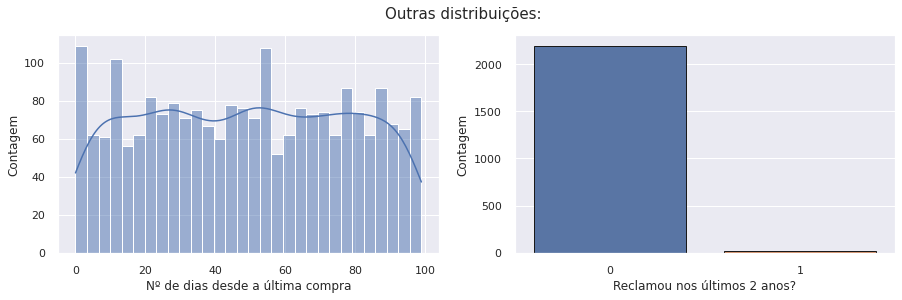

In [22]:
fig = plt.figure(figsize=(15,4))

fig.suptitle('Outras distribuições:', fontsize=15)

plt.subplot(121)
sns.histplot(data=df, x='Recency', kde=True, bins=30)
plt.xlabel("Nº de dias desde a última compra", fontsize=12)
plt.ylabel("Contagem", fontsize=12)

plt.subplot(122)
sns.countplot(x='Complain', ec='k', data=df)
plt.xlabel("Reclamou nos últimos 2 anos?",fontsize=12)
plt.ylabel("Contagem",fontsize=12)

plt.show()

Como podemos ver, o tempo desde a última compra é bem variado entre os clientes do mercado, mas é evidente que a minoria não reclamou do mercado nos últimos anos, o que é bom!

Agora vamos lidar com as features relacionadas a produtos, promoções e local. Para fins de simplificação, iremos combinar algumas colunas:

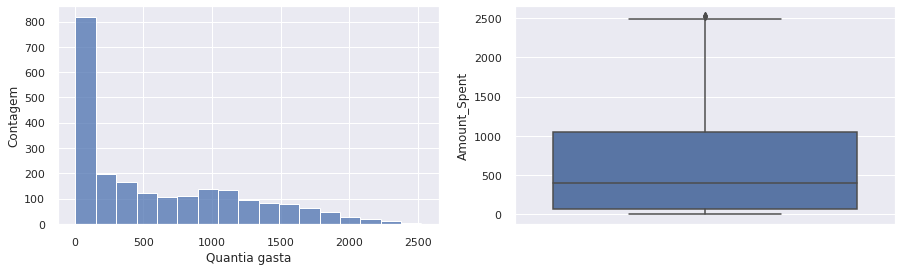

In [23]:
df["Amount_Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]
df.drop(columns=["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"], axis=1, inplace=True)

fig = plt.figure(figsize=(15,4))

plt.subplot(121)
sns.histplot(data=df, x='Amount_Spent')
plt.xlabel("Quantia gasta", fontsize=12)
plt.ylabel("Contagem", fontsize=12)

plt.subplot(122)
sns.boxplot(y = df['Amount_Spent'])

plt.show()

Como podemos ver, a maioria dos clientes gastou menos de 1000 dólares no mercado nos últimos 2 anos a antes da data em que os dados foram coletados.

Sobre as features relativas a promoções, também faremos uma combinação:

In [24]:
df["Total_AcceptedCmp"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]
df.drop(columns=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'], axis=1, inplace=True)

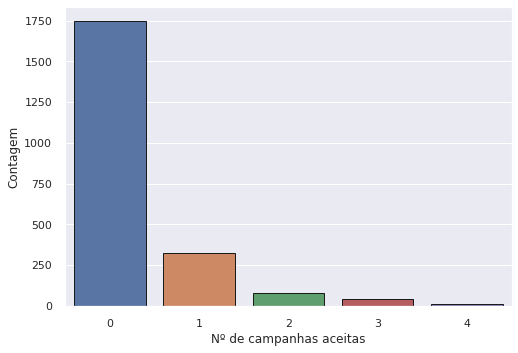

In [154]:
sns.countplot(x='Total_AcceptedCmp', ec='k', data=df)
plt.xlabel("Nº de campanhas aceitas", fontsize=12)
plt.ylabel("Contagem", fontsize=12)
plt.show()

A maioria dos clientes não captada por nenhuma campanha, o que talvez indique que o mercado deveria melhorar suas estratégias de marketing.

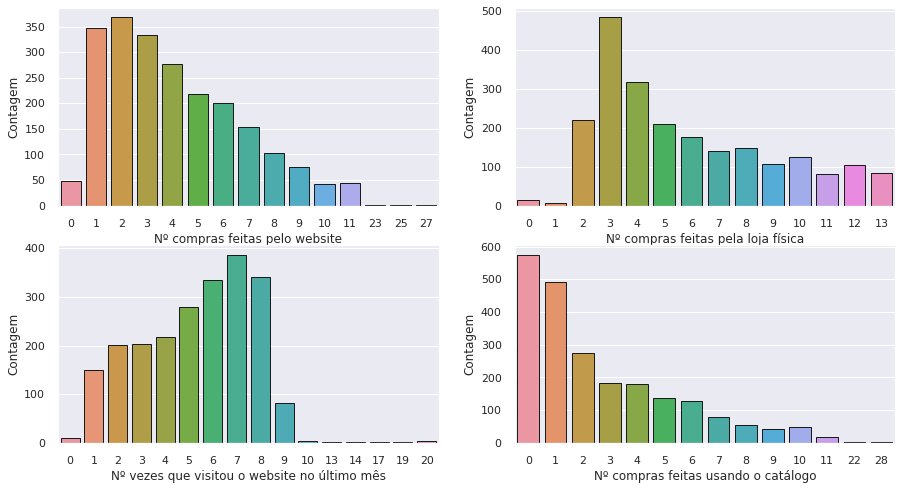

In [26]:
plt.figure(figsize=(15,8))

plt.subplot(221)
sns.countplot(x='NumWebPurchases', ec='k', data=df)
plt.xlabel("Nº compras feitas pelo website", fontsize=12)
plt.ylabel("Contagem", fontsize=12)

plt.subplot(222)
sns.countplot(x='NumStorePurchases', ec='k', data=df)
plt.xlabel("Nº compras feitas pela loja física", fontsize=12)
plt.ylabel("Contagem", fontsize=12)

plt.subplot(223)
sns.countplot(x='NumWebVisitsMonth', ec='k', data=df)
plt.xlabel("Nº vezes que visitou o website no último mês", fontsize=12)
plt.ylabel("Contagem", fontsize=12)

plt.subplot(224)
sns.countplot(x='NumCatalogPurchases', ec='k', data=df)
plt.xlabel("Nº compras feitas usando o catálogo", fontsize=12)
plt.ylabel("Contagem", fontsize=12)

plt.show()

Como podemos ver, a maioria fez poucas compras pelo website. O número de vezes em que acessaram o website no último mês, por outro lado, é maior.

O número de comrpas feitas pela loja física é melhor distribuído.

A maioria dos clientes fez poucas compras pelo catálogo.

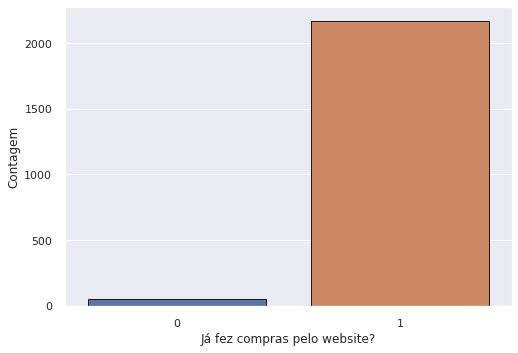

In [27]:
df['Already_purchased_from_website'] = np.where(df['NumWebPurchases'] > 0, 1, 0)
sns.countplot(data=df, x='Already_purchased_from_website', ec='k')
plt.xlabel("Já fez compras pelo website?", fontsize=12)
plt.ylabel("Contagem", fontsize=12)
plt.show()

A maioria dos clientes pelo visto já conhece e fez compras pelo website do mercado.

Vamos remover a coluna ID, pois ela não será útil para nossa análise:

In [28]:
df.drop(columns=['ID'], axis=1, inplace=True)

Também removeremos as colunas 'Z_CostContact' e 'Z_Revenue' para fins de simplificação:

In [29]:
df.drop(columns=['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

Por fim, vamos ver uma descrição dos dados numéricos:

In [30]:
df.describe()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Time_being_customer,Age,Living_Alone,NumChildren,Is_Parent,Amount_Spent,Total_AcceptedCmp,Already_purchased_from_website
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,49.012635,2.323556,4.085289,2.671029,5.800993,5.319043,0.009477,0.150271,512.006318,53.179603,0.354693,0.947202,0.714350,607.075361,0.298285,0.978339
std,25173.076661,28.948352,1.923716,2.740951,2.926734,3.250785,2.425359,0.096907,0.357417,232.469034,11.985554,0.478528,0.749062,0.451825,602.900476,0.679209,0.145606
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000
25%,35303.000000,24.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,340.000000,45.000000,0.000000,0.000000,0.000000,69.000000,0.000000,1.000000
50%,51381.500000,49.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,513.000000,52.000000,0.000000,1.000000,1.000000,396.500000,0.000000,1.000000
75%,68522.000000,74.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,686.000000,63.000000,1.000000,1.000000,1.000000,1048.000000,0.000000,1.000000
max,666666.000000,99.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1063.000000,129.000000,1.000000,3.000000,1.000000,2525.000000,4.000000,1.000000


Vamos dar uma olhada nas features que sobraram:

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Education                       2216 non-null   object 
 1   Income                          2216 non-null   float64
 2   Recency                         2216 non-null   int64  
 3   NumDealsPurchases               2216 non-null   int64  
 4   NumWebPurchases                 2216 non-null   int64  
 5   NumCatalogPurchases             2216 non-null   int64  
 6   NumStorePurchases               2216 non-null   int64  
 7   NumWebVisitsMonth               2216 non-null   int64  
 8   Complain                        2216 non-null   int64  
 9   Response                        2216 non-null   int64  
 10  Time_being_customer             2216 non-null   int64  
 11  Age                             2216 non-null   int64  
 12  Living_Alone                    22

Vamos analisar algumas features em conjunto:

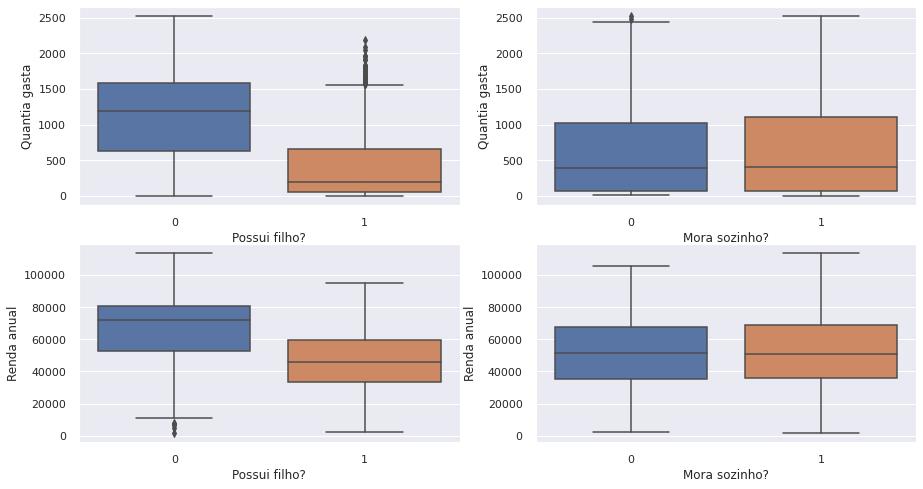

In [174]:
plt.figure(figsize=(15,8))

plt.subplot(221)
sns.boxplot(y = df['Amount_Spent'], x=df['Is_Parent'])
plt.xlabel("Possui filho?", fontsize=12)
plt.ylabel("Quantia gasta", fontsize=12)

plt.subplot(222)
sns.boxplot(y = df['Amount_Spent'], x=df['Living_Alone'])
plt.xlabel("Mora sozinho?", fontsize=12)
plt.ylabel("Quantia gasta", fontsize=12)

plt.subplot(223)
sns.boxplot(y = df['Income'], x=df['Is_Parent'])
plt.xlabel("Possui filho?", fontsize=12)
plt.ylabel("Renda anual", fontsize=12)

plt.subplot(224)
sns.boxplot(y = df['Income'], x=df['Living_Alone'])
plt.xlabel("Mora sozinho?", fontsize=12)
plt.ylabel("Renda anual", fontsize=12)

plt.show()

Não se pode dizer nada sobre a influência de morar sozinho ou não e a renda anual ou a quantidade gasta, mas é possível notar um aumento na renda anual e na quantia gasta para aqueles que não possuem filhos.

A matriz de correlação entre as features pode ser vista a seguir:

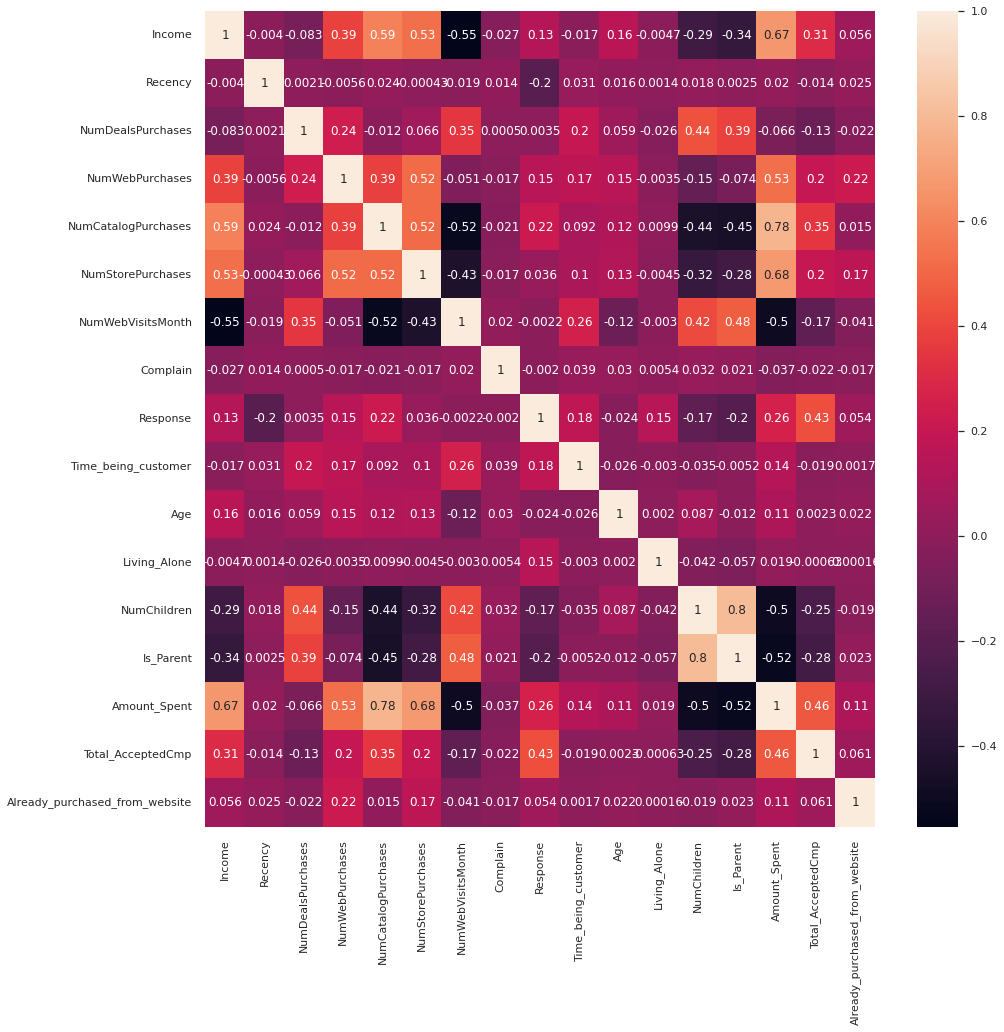

In [32]:
corr_matrix= df.corr() 

plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True)
plt.show()

Existem algumas features que são bem correlacionadas entre si, em muitos casos provavelmente por terem sido derivadas da mesma coluna. Resta saber quais explicam melhor os dados.

##**3. Data preparation (Preparação dos dados)**

Ainda temos uma coluna categórica (Education). 

Trata-se de uma feature categórica ordinal, uma vez que existe uma relação de ordem entre os níveis de escolaridade. Portanto, nesse caso podemos simplesmente atribuir valores numéricos que respeitem essa ordem:

In [33]:
df["Education"]= df["Education"].replace({"Non-Graduate": 1, "Graduate": 2, "Post-Graduate": 3})
df["Education"].dtype

dtype('int64')

Pronto, todas as nossas features agora são numéricas. O próximo passo é remover os outliers e fazer a reescala dos dados.

In [34]:
def remove_outliers(df: pd.DataFrame, feature: str) -> pd.DataFrame:
  """
  Dado um dataframe pandas e a feature de interesse, remove os outliers e
  retorna a base.
  Parâmetros
  ----------
  df : pd.DataFrame
    Base de dados.
  feature : str
    Nome da feature cujos outliers devem ser removidos.
  Retorno
  ----------
  pd.DataFrame
    Base de dados sem os outliers da feature especificada.
  """

  # Calculando a distância interquartílica:
  Q1 = np.percentile(df[feature], 25)
  Q3 = np.percentile(df[feature], 75)
  IQR = Q3 - Q1

  # Calculando os limites inferior e superior:
  lower_limit = Q1 - 1.5 * IQR
  upper_limit = Q3 + 1.5 * IQR

  # Removendo os outliers
  df = df[(df[feature] > lower_limit) & (df[feature] < upper_limit)]

  return df

In [35]:
print(f'Tamanho da base antes da remoção dos outliers: {df.shape[0]}')
df = remove_outliers(df, 'Income')
df = remove_outliers(df, 'Age')
print(f'Tamanho da base após a remoção dos outliers: {df.shape[0]}')

Tamanho da base antes da remoção dos outliers: 2216
Tamanho da base após a remoção dos outliers: 2205


Vamos dar uma olhada novamente nas distribuições dessas duas features agora que os outliers foram removidos:

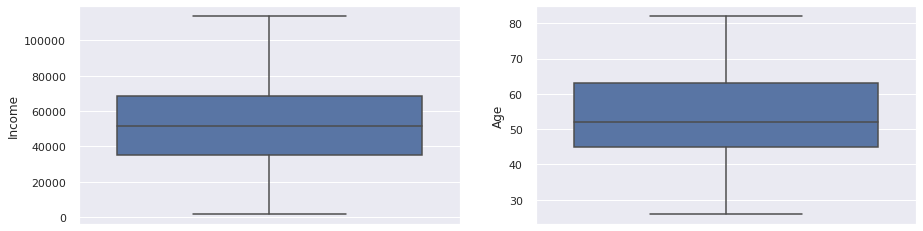

In [36]:
plt.figure(figsize=(15,4))

plt.subplot(121)
sns.boxplot(y = df['Income'])

plt.subplot(122)
sns.boxplot(y = df['Age'])

fig.show()

In [37]:
print(f"Mediana da idade: {df['Income'].median()}")
print(f"Mediana da renda anual: {df['Age'].median()}")

Mediana da idade: 51287.0
Mediana da renda anual: 52.0


Agora sim temos uma noção melhor da distribuição da renda anual e da idade.

Como podemos ver, metade dos clientes possuem renda anual abaixo de 51287 dólares e até 52 anos.

Vamos reescalar os dados:

In [38]:
from sklearn.preprocessing import StandardScaler

df_standard = StandardScaler().fit_transform(df.copy())
df_standard = pd.DataFrame(df_standard, columns=df.columns)

df_standard.head()

,Education,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Time_being_customer,Age,Living_Alone,NumChildren,Is_Parent,Amount_Spent,Total_AcceptedCmp,Already_purchased_from_website
0,-0.409469,0.314651,0.310830,0.361479,1.424772,2.628526,-0.562650,0.689203,-0.095673,2.370996,1.974128,1.017189,1.347625,-1.266589,-1.58466,1.679323,-0.439991,0.139347
1,-0.409469,-0.254877,-0.380600,-0.168834,-1.132957,-0.588043,-1.179732,-0.139645,-0.095673,-0.421764,-1.664957,1.273530,1.347625,1.403420,0.63105,-0.963897,-0.439991,0.139347
2,-0.409469,0.965354,-0.795458,-0.699147,1.424772,-0.230646,1.288596,-0.554069,-0.095673,-0.421764,-0.172330,0.333612,-0.742046,-1.266589,-1.58466,0.281242,-0.439991,0.139347
3,-0.409469,-1.206087,-0.795458,-0.168834,-0.767567,-0.945440,-0.562650,0.274779,-0.095673,-0.421764,-1.923048,-1.289883,-0.742046,0.068415,0.63105,-0.920675,-0.439991,0.139347
4,1.126039,0.322136,1.555404,1.422105,0.328602,0.126750,0.054432,-0.139645,-0.095673,-0.421764,-0.821859,-1.033542,-0.742046,0.068415,0.63105,-0.307248,-0.439991,0.139347


##**4. Modeling (Modelagem)**

Como a base resultante da seção anterior ainda possui muitas features (18), o modelo corre risco de sofrer da maldição da dimensionalidade. Portanto, vamos utilizar a técnica do PCA para pegar apenas as features mais importantes.

In [39]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3) # Vamos escolher apenas 3 componentes principais, pois mais do que isso fica difícil visualizar num plot
df_after_pca = pd.DataFrame(pca.fit_transform(df_standard), columns=(["PC-1","PC-2", "PC-3"]))
df_after_pca

,PC-1,PC-2,PC-3
0,-2.928185,1.035043,2.684646
1,1.999799,-0.614340,-1.216558
2,-2.104624,-0.513270,-0.607117
3,2.167423,-1.348163,-0.424526
4,0.372814,0.918109,-1.206534
...,...,...,...
2200,-0.652146,0.985007,-0.475833
2201,0.851468,3.317131,-1.838066
2202,-2.076022,-1.534487,0.077984
2203,-1.463444,0.902548,-1.803906


In [40]:
pc_influence_df = pd.DataFrame(pca.components_,columns=df_standard.columns,index = ['PC-1','PC-2', 'PC-3'])

Vamos dar uma olhada na influência das features em cada componente principal:

In [41]:
print("Maiores pesos: ")
display(pc_influence_df.T.describe().loc[['min', 'max']])
print("\nFeatures x PCs:")
display(pc_influence_df)

Maiores pesos: 


,PC-1,PC-2,PC-3
min,-0.413454,-0.036928,-0.303944
max,0.303798,0.535966,0.567096



Features x PCs:


,Education,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Time_being_customer,Age,Living_Alone,NumChildren,Is_Parent,Amount_Spent,Total_AcceptedCmp,Already_purchased_from_website
PC-1,-0.049397,-0.395189,0.001619,0.104250,-0.233190,-0.378404,-0.328062,0.303798,0.017516,-0.137829,-0.020479,-0.072697,-0.018910,0.295434,0.303567,-0.413454,-0.226134,-0.078427
PC-2,0.148784,0.112445,0.008761,0.535966,0.421852,0.077850,0.218558,0.229658,0.010105,0.058181,0.258493,0.206185,-0.036928,0.349491,0.350762,0.113617,-0.007528,0.145006
PC-3,-0.169909,-0.166387,-0.229708,0.059973,0.025972,-0.004036,-0.160410,0.327960,0.040208,0.567096,0.403064,-0.303944,0.184448,-0.150968,-0.122376,0.036125,0.309750,-0.077512


Em termos de valor absoluto, a feature que mais influencia o PC-1 é 'Amount_Spent', enquanto para o PC-2 é 'NumDealsPurchases' e no caso do PC-3 é 'Response'.

O algoritmo que utilizaremos para fazer o agrupamento será o K-Means, por ser simples e rápido. 

Além disso, para definir o número de clusters a serem formados utilizaremos o Elbow Method, considerando a distorção (soma dos quadrados das distâncias de cada ponto para o centro do seu cluster) para valores de 2 <= k <= 10.

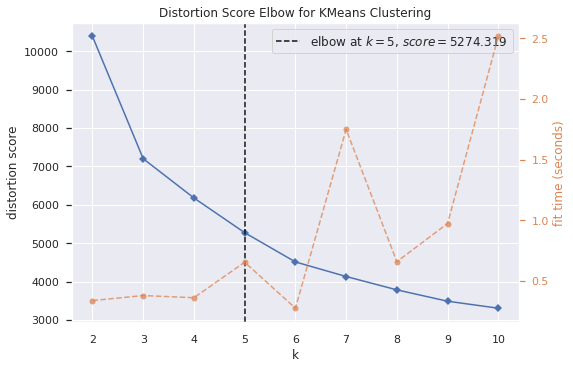

In [42]:
elbow = KElbowVisualizer(KMeans(), k=10)
elbow.fit(df_after_pca)
elbow.show()
plt.show()

Como mostra a linha tracejada, o "cotovelo" da curva é quando k = 5. Portanto, formaremos 5 clusters!

In [50]:
model = KMeans(n_clusters=5)
model.fit(df_after_pca)
predict = model.predict(df_after_pca) + 1 # Somando 1 para o index começar do 1 e não do 0

In [51]:
df_after_pca['Cluster'] = predict

fig = px.scatter_3d(df_after_pca, x='PC-1', y='PC-2', z='PC-3', color='Cluster', opacity=0.7, title="Visualização dos clusters para cada componente principal:")
fig.show()

Vamos acrescentar os clusters ao dataframe original:

In [53]:
df.insert(0, "Cluster", predict)
df.head()

,Cluster,Education,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Time_being_customer,Age,Living_Alone,NumChildren,Is_Parent,Amount_Spent,Total_AcceptedCmp,Already_purchased_from_website
0,5,Graduate,58138.0,58,3,8,10,4,7,0,1,971,65,1,0,0,1617,0,1
1,1,Graduate,46344.0,38,2,1,1,2,5,0,0,125,68,1,2,1,27,0,1
2,2,Graduate,71613.0,26,1,8,2,10,4,0,0,472,57,0,0,0,776,0,1
3,1,Graduate,26646.0,26,2,2,0,4,6,0,0,65,38,0,1,1,53,0,1
4,3,Post-Graduate,58293.0,94,5,5,3,6,5,0,0,321,41,0,1,1,422,0,1


##**5. Evaluation (Validação)**


Agora vamos avaliar o agrupamento e relacionar algumas features com os clusters.

In [73]:
cluster_count = df['Cluster'].value_counts().sort_index()
labels = cluster_count.index
values = cluster_count.values
fig1 = px.histogram(df, x='Cluster', color_discrete_sequence=['#fdca26'])
fig1.update_layout(title_font_family="Century Gothic", title_text="Distribuição dos clusters:",
                   width=600, height=450, yaxis_title="Contagem", plot_bgcolor='#fff')
fig1.update_traces(marker_line_width=0.3, marker_line_color="black", hovertemplate="Quantidade: %{y}<extra></extra>")
fig1.show()

Como podemos ver, o cluster 1 possui mais dados e os demais estão melhor distribuídos entre si. Vamos dar uma olhada nas demais features:

Para melhorar o entendimento do gráfico, vamos tornar os valores possíveis da coluna 'Education' categóricos novamente.

In [47]:
df["Education"]= df["Education"].replace({1: "Non-Graduate", 2: "Graduate", 3: "Post-Graduate"})

In [74]:
fig2 = px.histogram(df, x='Cluster', color="Education", barmode='group', color_discrete_sequence=px.colors.sequential.Plasma_r)
fig2.update_layout(title_font_family="Century Gothic", title_text="Distribuição do nível de educação por cluster:",
                   width=600, height=450, yaxis_title="Contagem", plot_bgcolor='#fff')
fig2.update_traces(marker_line_width=0.3, marker_line_color="black")
fig2.show()

Do gráfico acima podemos tirar as seguintes informações:
- No cluster 1 predominam os clientes que possuem apenas graduação, mas também é o que possui mais clientes sem graduação, se comparar com os demais.
- Nos demais clusters, o número de clientes sem graduação é baixo e o número de clientes com graduação ou pós-graduação é relativamente próximo.

In [75]:
fig3 = go.Figure(data=[go.Box(y=df['Income'], x=df['Cluster'], boxmean=True, marker_color='#fdca26')])
fig3.update_layout(title_font_family="Century Gothic", title_text="Distribuição da renda anual por cluster:",
                   width=1200, height=500, yaxis_title="Renda anual", plot_bgcolor='#fff')
fig3.update_traces(marker_line_width=0.3, marker_line_color="black")
fig3.show()

Dos boxplots acima, podemos tirar as seguintes conclusões:
- O cluster 5, em geral, é composto por pessoas com maior poder aquisitivo, pois somente 25% dos clientes possui renda anual abaixo de 69,786 mil dólares e 50% dos clientes possui entre 69,786 e 84,38725 mil dólares (intervalo superior aos demais em termo de renda anual elevada)
- Em seguida, o cluster 2 é o segundo melhor em termos de poder aquisitivo elevado, pois 50% dos clientes possuem renda anual entre 69,476 e 81,217 mil dólares. Também se trata de um cluster cuja distribuição de renda é bem simétrica, possuindo média e mediana quase iguais (75,03155 e 75,507 mil, respectivamente).
- Os demais clusters possuem clientes com menor poder aquisitivo, sendo o pior deles o cluster 1, em que 75% das pessoas possuem renda anual menor que 41,424 mil dólares (o que faz sentido, pois também é o cluster que possui mais clientes sem graduação).
- Em geral, a média e a mediana são bem próximas em todos os clusters, sendo mais divergente somente no cluster 5, mas ainda sim uma diferença baixa.

Vamos dar uma olhada na quantia gasta por cliente nos 2 anos anteriores à coleta dos dados em cada cluster:

In [137]:
fig4 = go.Figure(data=[go.Box(y=df['Amount_Spent'], x=df['Cluster'], boxmean=True, marker_color='#fdca26')])
fig4.update_layout(title_font_family="Century Gothic", title_text="Distribuição da quantia gasta por cluster:",
                   width=1200, height=500, yaxis_title="Quantia gasta", plot_bgcolor='#fff')
fig4.update_traces(marker_line_width=0.3, marker_line_color="black")
fig4.show()

Dos boxplots acima, é possível extrair as seguintes informações:
- O cluster 1 possui os clientes que menos gastaram.
- Os clusters 2 e 5 possuem os clientes que mais gastaram.
- Os clusters 3 e 4 ficam no meio em relação aos clusters citados anteriormente.

Isso nos dá indício de uma tendência entre renda anual e quantia gasta, que será explorada através de uma dispersão mais a frente.

In [79]:
fig5 = px.histogram(df, color='Cluster', x="NumDealsPurchases", barmode='group', color_discrete_sequence=px.colors.sequential.Plasma_r)
fig5.update_layout(title_font_family="Century Gothic", title_text="Nº de compras feitas com desconto por cluster:",
                   width=600, height=450, yaxis_title="Contagem", plot_bgcolor='#fff')
fig5.update_traces(marker_line_width=0.3, marker_line_color="black")
fig5.show()

A maioria dos clientes fez até 3 compras com desconto. Sobre os clusters, pode-se notar que clientes dos clusteres 2 e 5 fizeram um número de compras com desconto menor (de 0 a 5), enquanto clientes dos clusters 1, 3 e 4 fizeram até 15 compras com desconto. O que pode ter a ver com o poder aquisitivo de cada grupo.

In [91]:
fig6 = px.histogram(df, color='Cluster', x="NumWebPurchases", barmode='group', color_discrete_sequence=px.colors.sequential.Plasma_r)
fig6.update_layout(title_font_family="Century Gothic", title_text="Nº de compras feitas pelo website por cluster:",
                   width=600, height=450, yaxis_title="Contagem", plot_bgcolor='#fff')
fig6.update_traces(marker_line_width=0.3, marker_line_color="black")
fig6.show()
fig7 = px.histogram(df, color='Cluster', x="NumStorePurchases", barmode='group', color_discrete_sequence=px.colors.sequential.Plasma_r)
fig7.update_layout(title_font_family="Century Gothic", title_text="Nº de compras feitas na loja física por cluster:",
                   width=600, height=450, yaxis_title="Contagem", plot_bgcolor='#fff')
fig7.update_traces(marker_line_width=0.3, marker_line_color="black")
fig7.show()

É possível notar que tanto na loja física quanto no website, o grupo que fez menos compras foi o do cluster 1, que possui o menor poder aquisitivo.

Vamos analisar a distribuição de idade pelos clusters:

In [139]:
fig8 = go.Figure(data=[go.Box(y=df['Age'], x=df['Cluster'], boxmean=True, marker_color='#fdca26')])
fig8.update_layout(title_font_family="Century Gothic", title_text="Distribuição da quantia gasta por cluster:",
                   width=1200, height=500, yaxis_title="Quantia gasta", plot_bgcolor='#fff')
fig8.update_traces(marker_line_width=0.3, marker_line_color="black")
fig8.show()

A idade é relativamente bem distribuída nos clusters, mas vale ressaltar que o cluster 3 apresenta clientes mais idosos em geral, enquanto o cluster 1 possui clientes mais novos.

In [147]:
fig9 = px.histogram(df, color='Cluster', x="Living_Alone", barmode='group', color_discrete_sequence=px.colors.sequential.Plasma_r)
fig9.update_layout(title_font_family="Century Gothic", title_text="Distribuição dos clientes que moram sozinhos ou com parceiro por cluster:",
                   width=600, height=450, yaxis_title="Contagem", plot_bgcolor='#fff')
fig9.update_traces(marker_line_width=0.3, marker_line_color="black")
fig9.show()

No cluster 5 o número de clientes que moram com algum parceiro e clientes que moram sozinhos é bem equilibrado. Nos demais clusters o número de clientes que moram com um parceiro é predominante.


In [157]:
fig10 = px.histogram(df, color='Cluster', x="Is_Parent", barmode='group', color_discrete_sequence=px.colors.sequential.Plasma_r)
fig10.update_layout(title_font_family="Century Gothic", title_text="Clientes com e sem filhos por cluster:",
                   width=600, height=450, xaxis_title="É pai/mãe?",yaxis_title="Contagem", plot_bgcolor='#fff')
fig10.update_traces(marker_line_width=0.3, marker_line_color="black")
fig10.show()

Sobre os clusteres, pode se dizer que eles são compostos, predominantemente, da seguinte forma:
- Cluster 1: são pais
- Cluster 2: não são pais
- Cluster 3: são pais
- Cluster 4: são pais
- Cluster 5: não são pais

Vamos aprofundar a análise, comparando o número de filhos:

In [156]:
fig11 = px.histogram(df, color='Cluster', x="NumChildren", barmode='group', color_discrete_sequence=px.colors.sequential.Plasma_r)
fig11.update_layout(title_font_family="Century Gothic", title_text="Nº de crianças em casa por cliente em cada cluster:",
                   width=600, height=450, xaxis_title="Nº de filhos", yaxis_title="Contagem", plot_bgcolor='#fff')
fig11.update_traces(marker_line_width=0.3, marker_line_color="black")
fig11.show()

Sobre os clusteres, pode se dizer que eles são compostos,  predominantemente,  da seguinte forma:
- Cluster 1: clientes que possuem um ou mais filhos
- Cluster 2: clientes que não possuem filhos
- Cluster 3: clientes que possuem um filho
- Cluster 4: clientes que possuem um ou mais filhos
- Cluster 5: clientes que não possuem filhos

Por fim, vamos analisar, em conjunto, a renda anual a quantia gasta, para cada cluster:

In [161]:
import statsmodels

fig7 = px.scatter(df, x="Income", y='Amount_Spent', color='Cluster', trendline="lowess")
fig7.update_layout(title_font_family="Century Gothic", title_text="Renda anual x Quantia gasta por cluster:",
                   width=800, height=450, xaxis_title="Renda anual", yaxis_title="Quantia gasta", plot_bgcolor='#fff')
fig7.update_traces(marker_line_width=0.3, marker_line_color="black")
fig7.show()

Nota-se uma relação positiva entre a renda anual e a quantia gasta. Além disso, a dispersão reforça algumas análises feitas anteriormente sobre os clusters:
- O cluster 1 possui clientes com a renda anual mais baixa e que gastaram menos
- Os clusters 2 e 5 possuem clientes com a maior renda anual e que gastaram mais
- O cluster 3 possui clientes com uma renda anual e gastos medianos
- O cluster 4 possui clientes com uma renda anual e gastos baixos

#### **Conclusão sobre os perfis dos clusters descobertos:**

**Cluster 1:**
- clientessem ou apenas com graduação
- clientes com o menor poder aquisitivo
- clientes que menos gastaram
- clientes relativamente mais jovens
- clientes que possuem um ou mais filhos

**Cluster 2:**
- clientes com graduação ou pós
- clientes com poder aquisitivo elevado
- clientes que mais gastaram
- clientes que menos fazem compras com desconto
- clientes de todas as idades
- clientes que não possuem filhos

**Cluster 3:**
- clientes com possuem graduação ou pós
- clientes com poder aquisitivo médio
- clientes com gastos medianos
- clientes relativamente mais velhos
- clientes que possuem um filho

**Cluster 4:**
- clientes com possuem graduação ou pós
- clientes com poder aquisitivo baixo
- clientes com gastos baixos
- clientes na meia idade
- clientes que possuem um ou mais filhos

**Cluster 5:**
- clientes com possuem graduação ou pós
- clientes com o maior poder aquisitivo
- clientes que mais gastaram
- clientes que menos fazem compras com desconto
- clientes de todas as idades
- clientes que não possuem filhos